# Sentiment Analysis

As at the time of creating this project, my request for developer account on Twitter was still under review by Twitter so I could not access the API yet.

Obtaining tweets from the API is a lot faster and easier compared to scraping the data. If I had access to the API, I could have otained the relevant data from Twitter with tweepy using keywords, e.g. 'Peter Obi' or some other factor. The alternative was to scrape tweets from Twitter so I scraped this hashtag "#PeterObiforPresident2023", a trend on Nigerian Twitter on 12th and 13th of June 2022.

I was able to scrape 86 tweets.

## Importing our libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import re
plt.style.use('seaborn-whitegrid')



In [7]:
#creating our driver object using our webdriver and passing the link to it
path = "C:/Users/user/chromedriver_win32_2/chromedriver.exe"
website= "https://twitter.com/search?q=%23PeterObiForPresident2023&src=trend_click&vertical=trends"

driver = webdriver.Chrome(path)
driver.get(website)
driver.set_window_position(600, 5)
driver.set_window_size(700, 700)

In [3]:
#creating a formula to obtain the username and tweet for every tweet
#the try and except is included in any instance there's no element in our code
#this will prevent the code from breaking
def tweet_col(element):
    try:
        usern= element.find_element_by_xpath(".//span[contains(text(), '@')]").text
        twttext= element.find_element_by_xpath(".//div[@lang]").text
    
        data_tweets= [usern, twttext]
    except:
        data_tweets = ["usern" , "twttext"]  #to prevent break of our code if there's 
                                            #no element in the above code
    return data_tweets

In [8]:
user=[]
text=[]
unique_tweets= set()

scroll = True
while scroll:
    #adding explicit wait to our code
    tweets = WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located(
    (By.XPATH,"//div[@class='css-1dbjc4n r-1iusvr4 r-16y2uox r-1777fci r-kzbkwu']")))

    for tweet in tweets:
        tweet_list= tweet_col(tweet)  #applying our function; this returns a list
        unique_tweet = ''.join(tweet_list)
        
        if unique_tweet not in unique_tweets: #we are filtering here
            unique_tweets.add(unique_tweet)  #so we don't have duplicate tweets
            usern= tweet_list[0]
            user.append(tweet_list[0])
            text.append(" ".join(tweet_list[1].split()))
            
    last_height = driver.execute_script("return document.body.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")
        time.sleep(3)
        new_height = driver.execute_script("return document.body.scrollHeight")
        
        if new_height == last_height: #this will break the outer while loop as well
            scroll = False           #as the inner loop when the last page is same sa
            break
        else:
            last_height= new_height
            break
            
driver.quit()
        


Running this code returned 82 tweets. If I ran the code again, more tweets could be returned as the first time I ran the code, it returned 150+ tweets. 

However, as selenium is extremely slow and requires lot of patience when scraping, I'll work with the 82 tweets that were returned.

In [30]:
len(user)

82

In [10]:
obi_tweets= pd.DataFrame({"user": user, "tweets": text})
obi_tweets

,user,tweets
0,@MLS_Teey,The reality is that one grid/greed must give w...
1,@iyke_nwabuko,"Peter Obi carry me go, for better Naija #Peter..."
2,@Kk_frontline,"Dear Nigerians, Stay positive, the good news i..."
3,@ejykmykel1,"Ndi Enugu, Locate a center close to you for IN..."
4,@Shehusky,If Twitter is buzzing with their candidate the...
...,...,...
77,@_sylverlyn_,This is how it will happen #PeterObiForPreside...
78,@AramideOyekunle,"Without tribalism, if you believe Peter Obi wi..."
79,@SirCharles0001,Expect Propaganda against Obi. They are so sca...
80,@real_westino,After seeing this from the presidential spokes...


In [12]:
#clean tweet texts

#creating a function using regex to clean the tweets
def cleantweet(text):
    text= re.sub(r'@[A-Za-z0-9]+', '', text) #this removes @mentions
    text=re.sub(r'#', '', text) #removing the hastag symbol
    text= re.sub(r'https?:\/\/\S+', '', text) #remove our hyperlink
    
    return text

In [13]:
obi_tweets['tweets'] = obi_tweets['tweets'].apply(cleantweet)

In [14]:
obi_tweets['tweets']

0     The reality is that one grid/greed must give w...
1     Peter Obi carry me go, for better Naija PeterO...
2     Dear Nigerians, Stay positive, the good news i...
3     Ndi Enugu, Locate a center close to you for IN...
4     If Twitter is buzzing with their candidate the...
                            ...                        
77    This is how it will happen PeterObiForPresiden...
78    Without tribalism, if you believe Peter Obi wi...
79    Expect Propaganda against Obi. They are so sca...
80    After seeing this from the presidential spokes...
81    At least have a reason to go get your PVC and ...
Name: tweets, Length: 82, dtype: object

In [15]:
#obtain the subjectivity 
def get_subject(text):  
    #subjectivity tells how subjective or opinionated the text is
    return TextBlob(text).sentiment.subjectivity

#obtain the polarity
def get_polarity(text):
    #tells how positive or negative the text is
    return TextBlob(text).sentiment.polarity

In [16]:
#creating our subjectivity and polarity columns
obi_tweets['subjectivity']= obi_tweets['tweets'].apply(get_subject)
obi_tweets['polarity']=obi_tweets['tweets'].apply(get_polarity)

In [17]:
obi_tweets

,user,tweets,subjectivity,polarity
0,@MLS_Teey,The reality is that one grid/greed must give w...,0.337500,-0.062500
1,@iyke_nwabuko,"Peter Obi carry me go, for better Naija PeterO...",0.500000,0.500000
2,@Kk_frontline,"Dear Nigerians, Stay positive, the good news i...",0.562374,0.211869
3,@ejykmykel1,"Ndi Enugu, Locate a center close to you for IN...",0.100000,-0.100000
4,@Shehusky,If Twitter is buzzing with their candidate the...,0.550000,-0.200000
...,...,...,...,...
77,@_sylverlyn_,This is how it will happen PeterObiForPresiden...,0.000000,0.000000
78,@AramideOyekunle,"Without tribalism, if you believe Peter Obi wi...",0.455556,0.477778
79,@SirCharles0001,Expect Propaganda against Obi. They are so sca...,0.083333,-0.133333
80,@real_westino,After seeing this from the presidential spokes...,0.550000,0.350000


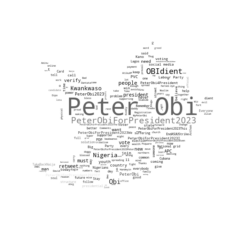

In [22]:
#lets create our wordcloud
stopwords = set(STOPWORDS)
#words we want to remove from our wordcloud
stopwords.add("will")
stopwords.add("go")
stopwords.add("let")
stopwords.add("11")
stopwords.add('d')
stopwords.add('s')
stopwords.add('we')
stopwords.add('us')

allwords = ''.join(i for i in obi_tweets['tweets'])
custom_mask= np.array(Image.open('C:/Users/user/desktop/pet.jpg'))
wordcloud= WordCloud(width= 700,  background_color='white',stopwords= 
                     stopwords ,mask = custom_mask,
                     max_font_size= 400)
wordcloud.generate(allwords)
image_color = ImageColorGenerator(custom_mask)
wordcloud.recolor(color_func = image_color)

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
wordcloud.to_file('peter_obi.png')
plt.show()

In [23]:
#create a fucntion to compute negative, neutral and positive analysis
def get_analysis(value):
  if value < 0:
    return 'Negative'
  elif value == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [24]:
obi_tweets['analysis'] = obi_tweets['polarity'].apply(get_analysis)
obi_tweets

,user,tweets,subjectivity,polarity,analysis
0,@MLS_Teey,The reality is that one grid/greed must give w...,0.337500,-0.062500,Negative
1,@iyke_nwabuko,"Peter Obi carry me go, for better Naija PeterO...",0.500000,0.500000,Positive
2,@Kk_frontline,"Dear Nigerians, Stay positive, the good news i...",0.562374,0.211869,Positive
3,@ejykmykel1,"Ndi Enugu, Locate a center close to you for IN...",0.100000,-0.100000,Negative
4,@Shehusky,If Twitter is buzzing with their candidate the...,0.550000,-0.200000,Negative
...,...,...,...,...,...
77,@_sylverlyn_,This is how it will happen PeterObiForPresiden...,0.000000,0.000000,Neutral
78,@AramideOyekunle,"Without tribalism, if you believe Peter Obi wi...",0.455556,0.477778,Positive
79,@SirCharles0001,Expect Propaganda against Obi. They are so sca...,0.083333,-0.133333,Negative
80,@real_westino,After seeing this from the presidential spokes...,0.550000,0.350000,Positive


In [25]:
#lets look at the positive tweets
x = 1
sorteddf= obi_tweets.sort_values(by= ['polarity'])
for i in range(0,sorteddf.shape[0]):
    if (sorteddf['analysis'][i] == 'Positive'):
        print(str(x) + ') ' + sorteddf['tweets'][i])
        print()
        x+=1

1) Peter Obi carry me go, for better Naija PeterObiForPresident2023

2) Dear Nigerians, Stay positive, the good news is coming. We are working hard. kwankwaso PeterObiForPresident2023 Kwankwaso/Obi or Obi/Kwankwaso. Just Retweet.

3) Even if they succeeded in baning social media, they can't ban my brain ni. PeterObiForPresident2023 have already registered in my memory so i take it to street with full mind and strength forward ever backward never is late.

4) Most of the people on social media campaigning for Tinubu or Atiku are political jobbers. Go and verify. PeterObiForPresident2023

5) I’ll render my family’s warehouse in zaria for Peter obi, as an extension of an office, this time Nigeria must be saved, we are all OBIdients , I’ll also help in educating people more, the benefits of choosing  as our next president PeterObiForPresident2023

6) Without tribalism, if you believe Peter Obi will win the fort coming presidential election. Kindly Like and retweet Remember the power of soc

In [26]:
#lets look at the negative tweets
x = 1
sorteddf= obi_tweets.sort_values(by= ['polarity'], ascending= False)
for i in range(0,sorteddf.shape[0]):
    if (sorteddf['analysis'][i] == 'Negative'):
        print(str(x) + ') ' + sorteddf['tweets'][i])
        print()
        x = x+ 1

1) The reality is that one grid/greed must give way for the other. If you want National grid to survive, you must kill your personal greed and vote for PeterObi2023 OBIdients PeterObiForPresident2023

2) Ndi Enugu, Locate a center close to you for INEC Continuous Voters Card Registration. Retweet Aggressively PeterObiForPresident2023 PeterObi4President PeterObi2023 _ikemba _City __City __ _naza 

3) If Twitter is buzzing with their candidate they will be gland. They will not say the supporters are "rude, uncultured, and thugs". But because it's Peter Obi that's trending, they are bitter. The bitterness will choke them. PeterObiForPresident2023

4) The true legacy of Buhari is this. That: "Bad behavior, mediocre work,failure has no consequence" This does not align with natural law... This is an anomaly. Voting PeterObiForPresident2023 Seeks to correct that

5) I lost my dad yesterday, he promise me to vote for  but today he's no more. May his soul rest in peace amen. Rest In Peace big d

While some of the tweets don't appear negative, it can be that the program saw a word, for instance 'evil' in the sentence and tagged the tweet as negative. 

Text(0.5, 1.0, 'Polarity v Subjectivity')

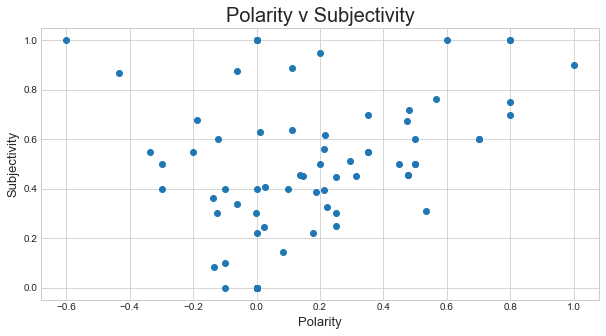

In [27]:
#plot the polarity and subjectivity
plt.figure(figsize=(10,5))

plt.scatter(data= obi_tweets, x= 'polarity', y= 'subjectivity')
plt.xlabel('Polarity', fontdict= {'fontsize': 13})
plt.ylabel('Subjectivity', fontdict= {'fontsize': 13})
plt.title('Polarity v Subjectivity', fontdict= {'fontsize': 20})

In [28]:
#percentage of positive tweets
postweets= obi_tweets[obi_tweets['analysis'] == 'Positive']
postweetpercent = round((postweets.shape[0] / obi_tweets.shape[0])  * 100, 1)
print("The percentage of negative tweet is: " + str(postweetpercent) + '%')

The percentage of negative tweet is: 52.4%


In [29]:
#percentage of positive tweets
negtweets= obi_tweets[obi_tweets['analysis'] == 'Negative']
negtweetpercent = round((negtweets.shape[0] / obi_tweets.shape[0])  * 100, 1)
print("The percentage of negative tweet is: " + str(negtweetpercent) + '%')

The percentage of negative tweet is: 20.7%


Text(0.5, 1.0, 'Sentiment Analysis')

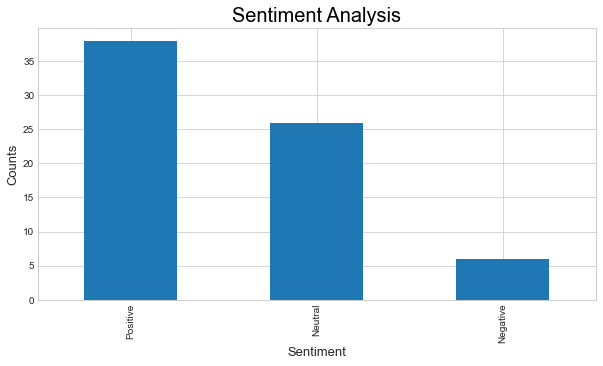

In [54]:
#lets plot the analysis variable
plt.figure(figsize= (10,5))

obi_tweets['analysis'].value_counts().plot(kind='bar')
plt.xlabel('Sentiment', fontdict= {'fontsize' : 13})
plt.ylabel('Counts', fontdict= {'fontsize':13})
plt.title('Sentiment Analysis', fontdict= {'fontsize': 20, 'color': 'black'})


It will appear we have more positive tweets than negative.

Take note that not all negative tweets are in a strict sense negative tweets.